<a href="https://colab.research.google.com/github/LMAPcoder/Distributed-Data-Analytics-Lab/blob/main/DDA_sheet7_grayscale_hadoop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab Distributed Data Analytics**

Leonardo Antiqui

N° 312940

Group 1

## Tutorial 7

### Setting up Hadoop infrastructure

Installing and configuring Java

In [ ]:
#Installing java 8 for compatibility purposes
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
#Switching java version to use as default (option 2)
!echo "2" | sudo update-alternatives --config java

There are 2 choices for the alternative java (providing /usr/bin/java).

  Selection    Path                                            Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/java      1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java   1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java to provide /usr/bin/java (java) in manual mode


In [ ]:
#Switching javac version to use as default (option 2)
!echo "2" | update-alternatives --config javac

There are 2 choices for the alternative javac (providing /usr/bin/javac).

  Selection    Path                                          Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/javac   1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/javac   1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/bin/javac    1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/javac to provide /usr/bin/javac (javac) in manual mode


In [ ]:
#Switching jps version to use as default (option 2)
!echo "2" | update-alternatives --config jps

There are 2 choices for the alternative jps (providing /usr/bin/jps).

  Selection    Path                                        Priority   Status
------------------------------------------------------------
* 0            /usr/lib/jvm/java-11-openjdk-amd64/bin/jps   1111      auto mode
  1            /usr/lib/jvm/java-11-openjdk-amd64/bin/jps   1111      manual mode
  2            /usr/lib/jvm/java-8-openjdk-amd64/bin/jps    1081      manual mode

Press <enter> to keep the current choice[*], or type selection number: update-alternatives: using /usr/lib/jvm/java-8-openjdk-amd64/bin/jps to provide /usr/bin/jps (jps) in manual mode


In [ ]:
#Checking java default version
!java -version

openjdk version "1.8.0_362"
OpenJDK Runtime Environment (build 1.8.0_362-8u372-ga~us1-0ubuntu1~20.04-b09)
OpenJDK 64-Bit Server VM (build 25.362-b09, mixed mode)


In [ ]:
#creating java home variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["JRE_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64/jre"
os.environ["PATH"] += ":$JAVA_HOME/bin:$JRE_HOME/bin:$HADOOP_HOME/bin:$HADOOP_HOME/sbin"

In [ ]:
#It is good practice to purge ssh before installation
!apt-get purge openssh-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Package 'openssh-server' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.


In [ ]:
#installing openssh-server
!apt-get install openssh-server -qq > /dev/null

In [ ]:

#starting the server
!service ssh start

 * Starting OpenBSD Secure Shell server sshd
   ...done.


In [ ]:
#creating a new rsa key pair with empty password
!ssh-keygen -t rsa -P "" -f ~/.ssh/id_rsa

Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:YGc7gyoegyK4A86xhXiFGqQhbNrd7Hgqbxp29Oz0CGk root@78b2c1a61cf0
The key's randomart image is:
+---[RSA 3072]----+
|.                |
|o+               |
|*o o oo o        |
|+ o o.o= .       |
|.o...o. S        |
|=+.o.=o  o       |
|O.X Eo+          |
|+B.Bo+ o         |
|..o=. o .        |
+----[SHA256]-----+


In [ ]:
#copying the key to autorized keys
!cat $HOME/.ssh/id_rsa.pub>>$HOME/.ssh/authorized_keys
#changing the permissions on the key
!chmod 0600 ~/.ssh/authorized_keys

In [ ]:
#conneting with the local machine
!ssh -o StrictHostKeyChecking=no localhost uptime

 19:18:42 up 7 min,  0 users,  load average: 0.94, 0.40, 0.18


Installing Hadoop 3.2.3

In [ ]:
#Downloading Hadoop 3.2.3
#From Google drive
!gdown 'https://drive.google.com/uc?id=12P5hpS2DjMG4P3YukBP0D4s6uUUEJG-A' -O hadoop-3.2.3.tar.gz
# !wget https://archive.apache.org/dist/hadoop/common/hadoop-3.2.3/hadoop-3.2.3.tar.gz #From official website

Downloading...
From: https://drive.google.com/uc?id=12P5hpS2DjMG4P3YukBP0D4s6uUUEJG-A
To: /content/hadoop-3.2.3.tar.gz
100% 492M/492M [00:10<00:00, 45.3MB/s]


In [ ]:
#untarring the file
!sudo tar -xzf hadoop-3.2.3.tar.gz
!rm hadoop-3.2.3.tar.gz #to remove the tar file

In [ ]:
#copying the hadoop file to user/local
!cp -r hadoop-3.2.3/ /usr/local/

In [ ]:
#Specifing the JAVA_HOME variable in hadoop-env.sh
!sed -i '/export JAVA_HOME=/a export JAVA_HOME=\/usr\/lib\/jvm\/java-8-openjdk-amd64' /usr/local/hadoop-3.2.3/etc/hadoop/hadoop-env.sh

In [ ]:
#creating hadoop home variable
os.environ["HADOOP_HOME"] = "/usr/local/hadoop-3.2.3"

Running Hadoop in Pseudo-distributed mode

In [ ]:
#Configuring core-site.xml
!sed -i '/<configuration>/a\
  <property>\n\
    <name>fs.defaultFS</name>\n\
    <value>hdfs://localhost:9000</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/core-site.xml

In [ ]:
#Configuring hdfs-site.xml
!sed -i '/<configuration>/a\
  <property>\n\
    <name>dfs.replication</name>\n\
    <value>1</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/hdfs-site.xml

In [ ]:
#Configuring mapred-site.xml
!sed -i '/<configuration>/a\
  <property>\n\
    <name>mapreduce.framework.name</name>\n\
    <value>yarn</value>\n\
  </property>\n\
  <property>\n\
    <name>mapreduce.job.maps</name>\n\
    <value>1</value>\n\
  </property>\n\
  <property>\n\
    <name>mapreduce.application.classpath</name>\n\
    <value>$HADOOP_MAPRED_HOME/share/hadoop/mapreduce/*:$HADOOP_MAPRED_HOME/share/hadoop/mapreduce/lib/*</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/mapred-site.xml

In [ ]:
#Configuring yarn-site.xml
!sed -i '/<configuration>/a\
  <property>\n\
    <description>The hostname of the RM.</description>\n\
    <name>yarn.resourcemanager.hostname</name>\n\
    <value>localhost</value>\n\
  </property>\n\
  <property>\n\
    <name>yarn.nodemanager.aux-services</name>\n\
    <value>mapreduce_shuffle</value>\n\
  </property>\n\
  <property>\n\
    <name>yarn.nodemanager.env-whitelist</name>\n\
    <value>JAVA_HOME,HADOOP_COMMON_HOME,HADOOP_HDFS_HOME,HADOOP_CONF_DIR,CLASSPATH_PREPEND_DISTCACHE,HADOOP_YARN_HOME,HADOOP_HOME,PATH,LANG,TZ,HADOOP_MAPRED_HOME</value>\n\
  </property>' \
$HADOOP_HOME/etc/hadoop/yarn-site.xml

In [ ]:
#Formatting to delete namenode mata data
!$HADOOP_HOME/bin/hdfs namenode -format

In [ ]:
#creating other necessary enviromenal variables
os.environ["HDFS_NAMENODE_USER"] = "root"
os.environ["HDFS_DATANODE_USER"] = "root"
os.environ["HDFS_SECONDARYNAMENODE_USER"] = "root"
os.environ["YARN_RESOURCEMANAGER_USER"] = "root"
os.environ["YARN_NODEMANAGER_USER"] = "root"

In [ ]:
#starting dfs nodes
!$HADOOP_HOME/sbin/start-dfs.sh
# !$HADOOP_HOME/sbin/stop-dfs.sh

Starting namenodes on [localhost]
Starting datanodes
Starting secondary namenodes [78b2c1a61cf0]
78b2c1a61cf0: Warning: Permanently added '78b2c1a61cf0,172.28.0.12' (ECDSA) to the list of known hosts.


In [ ]:
#starting yarn nodes
!$HADOOP_HOME/sbin/start-yarn.sh
# !$HADOOP_HOME/sbin/stop-yarn.sh

Starting resourcemanager
Starting nodemanagers


In [ ]:
#listing the deamons that are running
!jps

3987 SecondaryNameNode
4355 NodeManager
3799 DataNode
3687 NameNode
4248 ResourceManager
4463 Jps


In [ ]:
#Creating a directory within dfs
!$HADOOP_HOME/bin/hdfs dfs -mkdir /Image

### Exercises

1. Convert Image to Grayscale

In [ ]:
#-From Google Drive
!wget --no-check-certificate -q 'https://docs.google.com/uc?export=download&id=15d1ZQvpYSXWay7rlYL4Q5XhbQ5OKUhDR' -O inpt.txt
!wget --no-check-certificate -q 'https://docs.google.com/uc?export=download&id=15CCWNOblTtJsd0RpuCudpHk2pMX4vfVk' -O win_back.jpg

In [ ]:
import numpy as np
from PIL import Image

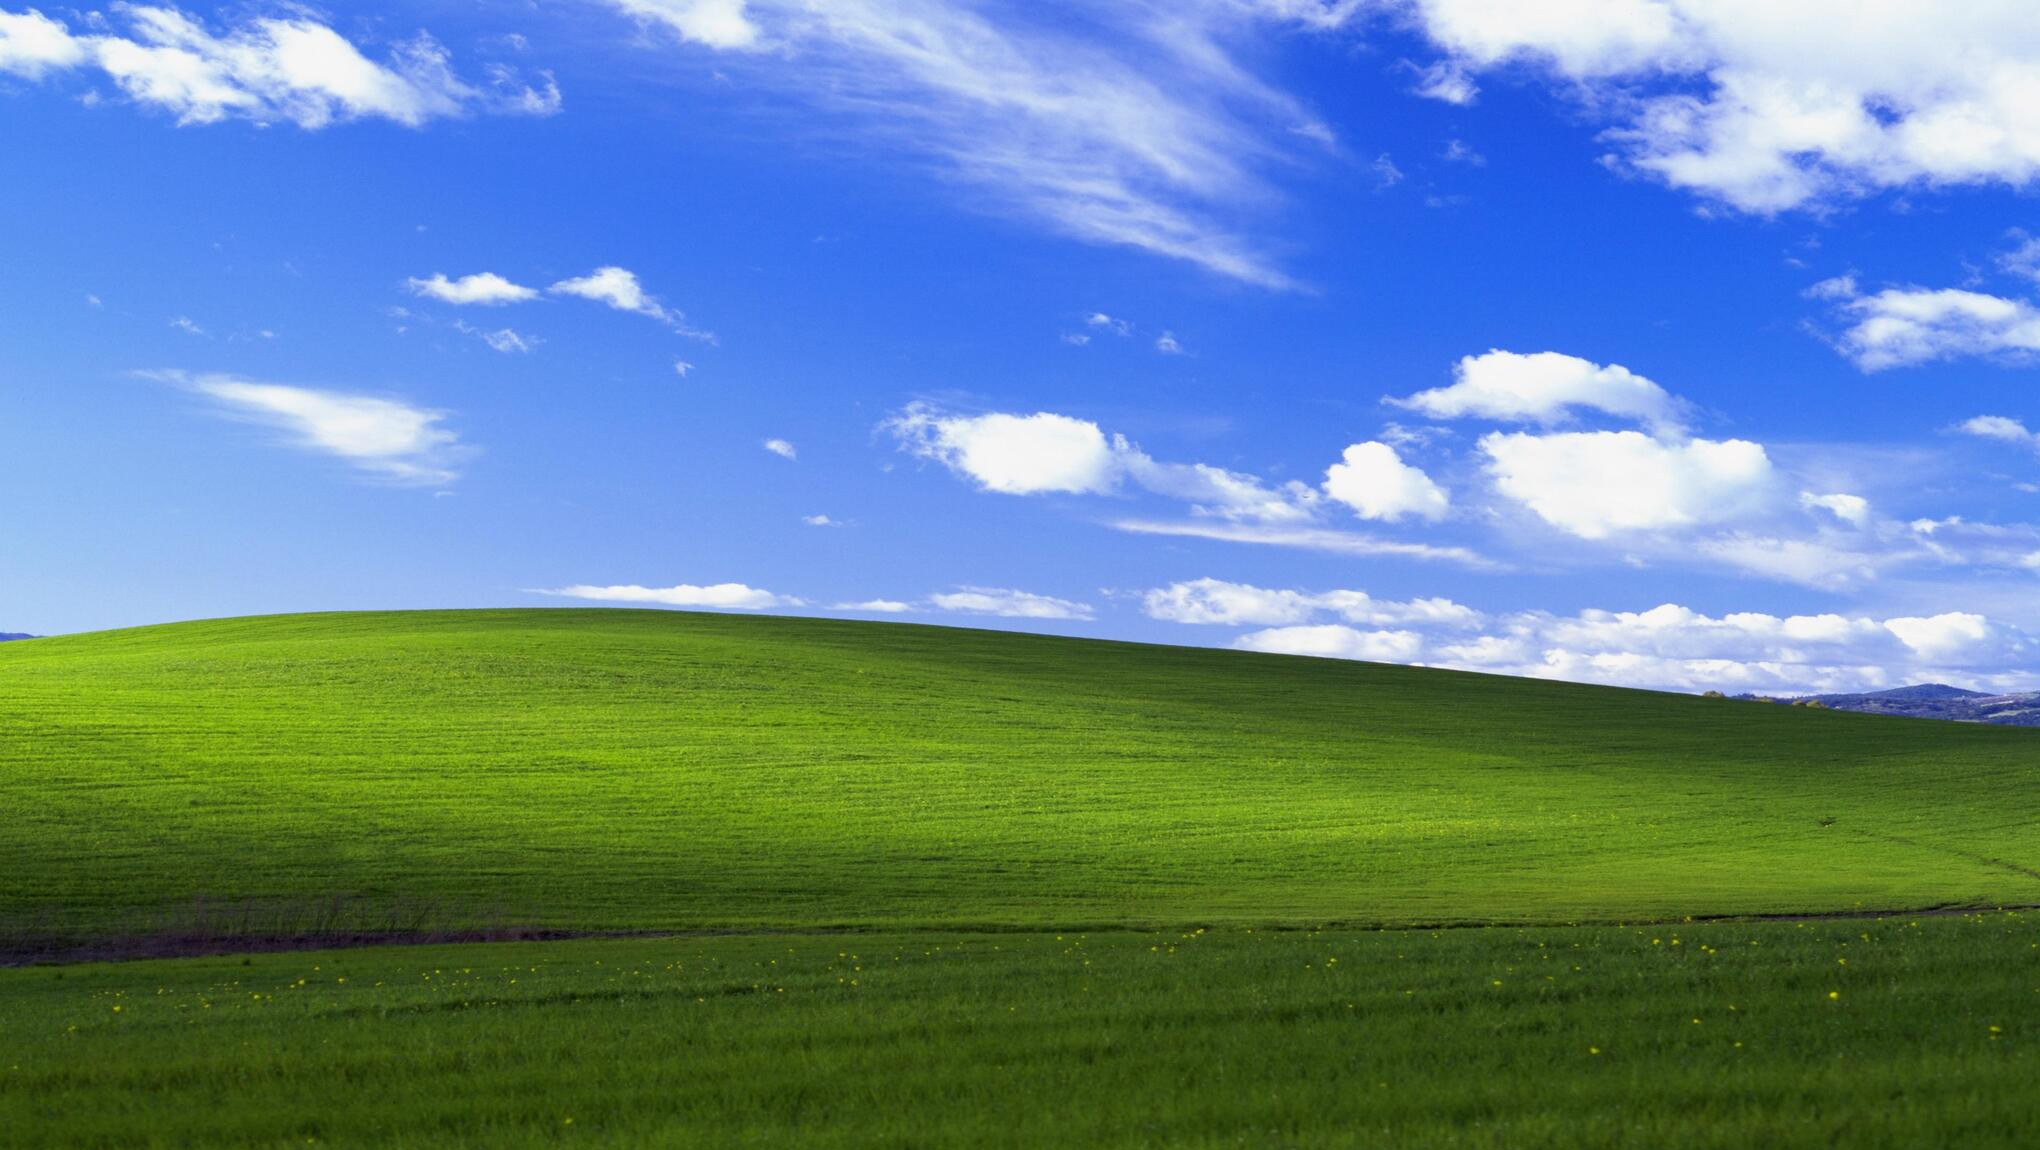

In [ ]:
im = Image.open(r"win_back.jpg")
im.show()

In [ ]:
im.size

(2040, 1150)

In [ ]:
file = open(r"inpt.txt", 'r')
with file as fp:
  lines = len(fp.readlines())
  print('Total Number of lines:', lines)

Total Number of lines: 1150


In [ ]:
text = open(r"inpt.txt", 'r').read()
text[:100]

'[61 120 236],[62 121 237],[64 120 239],[64 120 239],[64 120 243],[65 121 244],[68 122 246],[70 124 2'

In [ ]:
#putting the file from local file system to hadoop distributed file system
!$HADOOP_HOME/bin/hdfs dfs -put /content/inpt.txt /Image

In [ ]:
#Exploring hadoop folder
!$HADOOP_HOME/bin/hdfs dfs -ls /Image

Found 1 items
-rw-r--r--   1 root supergroup   28597659 2023-06-11 19:24 /Image/inpt.txt


Mappper and reducer

This mapper requires that the number of launched map tasks = 1. Otherwise, each map task will initiate its own row index "i" and there will be repeated patch indices. If the number of  launched map tasks > 1, the row index must be added before in the input file. To adjust the number of launched map tasks, we need to set up the property "mapreduce.job.maps" in the file "mapred-site.xml" as done here.

In [ ]:
%%writefile mapper.py

#!/usr/bin/env python

# Libraries
import sys

N = int(sys.argv[1]) #window size

i = 0

# reading entire line from STDIN (standard input)
for line in sys.stdin:
  # to remove leading and trailing whitespace
  line = line.strip()
  # split the line into RGB arrays
  pixels = line.split(',')

  x = int(i / N)

  for j, pixel in enumerate(pixels):

    y = int(j / N)

    idx = str(x).zfill(4) + str(y).zfill(4) + '_' + str(i-x*N) + '_' + str(j-y*N)
    print('%s\t%s' % (idx, pixel))

  i = i + 1


Writing mapper.py


In [ ]:
#Testing the python files work properly
!head -n 1 inpt.txt | python mapper.py 10 | sort -k 1,1

In [ ]:
%%writefile reducer.py

#!/usr/bin/env python

import sys

current_patch = None
current_h = None

# read the entire line from STDIN
for line in sys.stdin:
  line = line.strip() # remove leading and trailing whitespace
  idx, pixel = line.split('\t')

  patch, h, w = idx.split('_')

  pixel = pixel.strip('[]').split()

  int_array = [int(num) for num in pixel]

  mean = sum(int_array) / len(int_array)
  mean = f'{mean:.1f}'

  if current_patch == patch:
    if current_h == h:
      grey_h.append(mean)
    else:
      grey_patch.append(grey_h)
      grey_h = list()
      grey_h.append(mean)
      current_h = h
  else:
    if current_patch:
      grey_patch.append(grey_h)
      print('%s\t%s' % (current_patch, grey_patch))

    grey_patch = list()
    grey_h = list()
    grey_h.append(mean)

    current_patch = patch
    current_h = h

grey_patch.append(grey_h)
print('%s\t%s' % (current_patch, grey_patch))

Writing reducer.py


In [ ]:
!cat inpt.txt | python mapper.py 10 | sort -k 1,1 | python reducer.py > outpt_test.txt

In [ ]:
#Changing the permissions of the python files
!chmod 777 /content/mapper.py /content/reducer.py

In [ ]:
#Running hadoop streaming
!$HADOOP_HOME/bin/hadoop jar $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-3.2.3.jar \
  -D map.output.key.field.separator=\t \
  -input /Image/inpt.txt \
  -output /Image/output \
  -mapper "python /content/mapper.py 10" \
  -reducer "python /content/reducer.py"

packageJobJar: [/tmp/hadoop-unjar411097037630382157/] [] /tmp/streamjob4677757671687044372.jar tmpDir=null
2023-06-11 19:27:02,071 INFO client.RMProxy: Connecting to ResourceManager at localhost/127.0.0.1:8032
2023-06-11 19:27:02,381 INFO client.RMProxy: Connecting to ResourceManager at localhost/127.0.0.1:8032
2023-06-11 19:27:02,727 INFO mapreduce.JobResourceUploader: Disabling Erasure Coding for path: /tmp/hadoop-yarn/staging/root/.staging/job_1686511433243_0002
2023-06-11 19:27:03,065 INFO mapred.FileInputFormat: Total input files to process : 1
2023-06-11 19:27:03,194 INFO mapreduce.JobSubmitter: number of splits:1
2023-06-11 19:27:03,249 INFO Configuration.deprecation: map.output.key.field.separator is deprecated. Instead, use mapreduce.map.output.key.field.separator
2023-06-11 19:27:03,432 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1686511433243_0002
2023-06-11 19:27:03,435 INFO mapreduce.JobSubmitter: Executing with tokens: []
2023-06-11 19:27:03,727 INFO conf.

In [ ]:
#Exploring hadoop folder
!$HADOOP_HOME/bin/hdfs dfs -ls /Image/output
# !$HADOOP_HOME/bin/hdfs dfs -rm -r /Image/output

Found 2 items
-rw-r--r--   1 root supergroup          0 2023-06-11 19:27 /Image/output/_SUCCESS
-rw-r--r--   1 root supergroup   20792003 2023-06-11 19:27 /Image/output/part-00000


In [ ]:
#Printing the output from hadoop file system
!$HADOOP_HOME/bin/hdfs dfs -head /Image/output/part-00000

00000000	[['139.0', '140.0', '141.0', '141.0', '142.3', '143.3', '145.3', '147.3', '143.7', '143.3'], ['141.0', '142.0', '142.7', '143.0', '142.7', '142.7', '143.7', '144.7', '144.3', '144.3'], ['141.3', '142.3', '143.0', '143.0', '143.0', '142.7', '141.7', '141.0', '142.7', '142.3'], ['139.3', '139.3', '139.7', '141.3', '143.0', '143.0', '141.0', '139.7', '140.7', '140.7'], ['137.3', '136.3', '136.0', '138.3', '140.7', '142.3', '142.0', '139.0', '142.7', '142.7'], ['140.3', '138.0', '135.7', '136.0', '139.3', '141.7', '142.0', '140.0', '145.7', '145.7'], ['149.0', '143.7', '137.7', '136.0', '139.3', '141.3', '141.3', '139.0', '144.7', '145.0'], ['155.0', '147.3', '140.7', '136.7', '139.3', '141.7', '140.3', '139.3', '141.0', '142.3'], ['153.7', '141.0', '156.3', '146.7', '145.7', '145.3', '141.0', '134.7', '139.3', '145.3'], ['167.7', '158.3', '141.3', '126.0', '150.3', '146.7', '143.0', '140.7', '142.3', '143.0']]
00000001	[['143.3', '142.3', '142.3', '142.0', '141.7', '142.7', '140.

In [ ]:
#Extracting files form HDFS
!$HADOOP_HOME/bin/hdfs dfs -get /Image/output/part-00000 /content/outpt.txt

2. Stitching the Image back together

In [ ]:
import ast

file = open('outpt.txt', 'r')
img = None
img_row = None
x = None

for line in file:
  line = line.strip()
  idx, patch = line.split('\t')
  x_current = idx[:4]
  patch_list = ast.literal_eval(patch)
  patch_narray = np.array(patch_list, dtype=float)

  if x_current == x:
    img_row = np.concatenate([img_row,patch_narray],axis=1)
  else:

    if img is not None:
      img = np.concatenate([img,img_row])
      img_row = patch_narray
    else:
      img = img_row
      img_row = patch_narray


    x = x_current

img = np.concatenate([img,img_row])

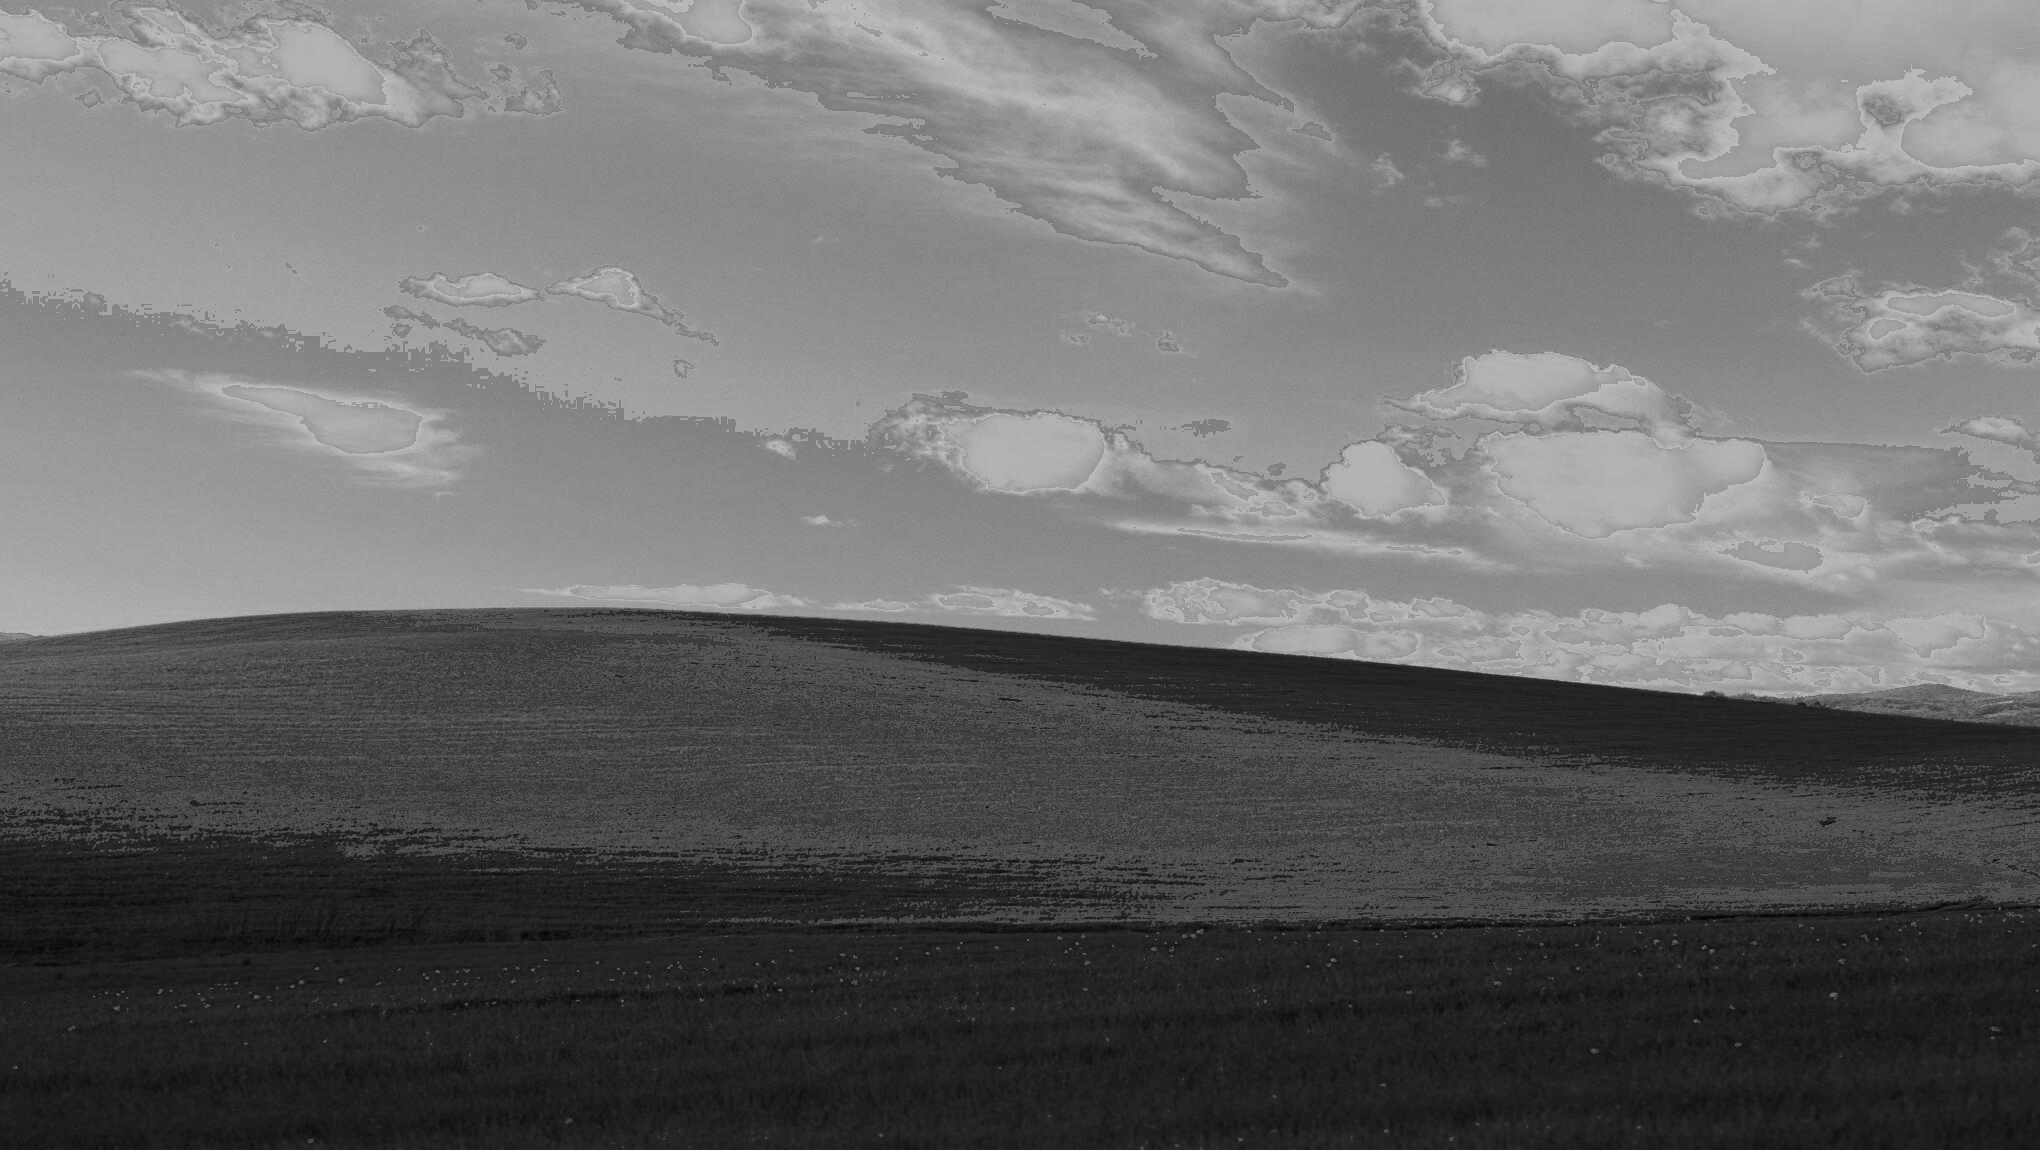

In [ ]:
image = Image.fromarray(img.astype(np.uint8), mode='L')
image.show()